# Classify brain tumor 2D scanned images into tumorus or healthy sample using Convolutional neural network

## Goal:
Our goal is to apply deep learning convolutional neural network alogirthm and build a model that allows us to classify brain tumor CT scanned images into healthy or tumorous sample.
The data is originally taken from kaggle website here:
https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

We use keras library and train the model using Sequential method.
The original images of brain are converted into a matrix data using function "ImageDataGenerator" defined in keras library.
We study the accuracy  at each epoch of the model training
In the end, we test the model againt known data and compute the confusion matrix to determine the validity of the model.


In [1]:
#Explore brain tumor image data using convolutional neural network
#Use TensorFlow, Keras library

In [2]:
#library for Computer Vision
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2023-05-08 16:43:54.856828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Download the training data and test data from Kaggle
# Read this page to learn how to download data from Kaggle
# https://www.geeksforgeeks.org/how-to-download-kaggle-datasets-into-jupyter-notebook
#Alternnatively, you can use the code below to directly download the data
#using your kaggle username and kaggle api key

import opendatasets as od
od.download("https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection")           
os.listdir('.')
os.listdir('brain-tumor-detection')

Skipping, found downloaded files in "./brain-tumor-detection" (use force=True to force download)


['pred', 'no', 'Br35H-Mask-RCNN', 'yes']

In [5]:
#Create directory for train, test and validation data set
#NameType_of_data = "train", "test", "validation"
def CreateImageFolder(NameType_of_data,Percentage):
    ROOT_DIR='brain-tumor-detection'
    tumor_neg = os.listdir('brain-tumor-detection/no')
    tumor_pos = os.listdir('brain-tumor-detection/yes')
    ROOT_DIR2 = os.path.join(ROOT_DIR, NameType_of_data)
    if not os.path.exists(ROOT_DIR2):
        os.makedirs(os.path.join(ROOT_DIR2,"yes"))
        os.makedirs(os.path.join(ROOT_DIR2,"no"))
    else:
        print(NameType_of_data,"folder exist inside ", ROOT_DIR)
    
    print(len(tumor_pos))
    print(len(tumor_neg))
    #print(tumor_neg)
    #a=[4,10,3.3, 4,6]
    tumor_neg_cut = np.random.choice(tumor_neg,size=int(len(tumor_neg)*Percentage/100), replace=False)
    tumor_pos_cut = np.random.choice(tumor_pos,size=int(len(tumor_pos)*Percentage/100), replace=False)

    print(len(tumor_pos_cut))
    print(len(tumor_neg_cut))
    for file in tumor_pos_cut:
        File1=ROOT_DIR + "/yes/" + file
        File2=ROOT_DIR + "/" + NameType_of_data +"/yes/" + file
        shutil.copy(File1, File2)

    for file in tumor_neg_cut:
        File1=ROOT_DIR + "/no/" + file
        File2=ROOT_DIR + "/" + NameType_of_data + "/no/" + file
        shutil.copy(File1, File2)
  
    mylist = os.listdir(os.path.join(ROOT_DIR2,"yes"))
    print(mylist[0:5])
    mylist = os.listdir(os.path.join(ROOT_DIR2,"no"))
    print(mylist[0:5])

In [6]:
#Collect all the positive and negative tumor detection images
# 1500 images with brain tumor and another 1500 images without brain tumor
#Create directory for train, test and validation data set
#NameType_of_data = "train", "test", "validation"
CreateImageFolder("train",70)

1500
1500
1050
1050
['y1425.jpg', 'y1431.jpg', 'y1357.jpg', 'y355.jpg', 'y433.jpg']
['no132.jpg', 'no654.jpg', 'no640.jpg', 'no898.jpg', 'no126.jpg']


In [7]:
CreateImageFolder("test",100)


1500
1500
1500
1500
['y369.jpg', 'y1343.jpg', 'y1425.jpg', 'y1431.jpg', 'y1357.jpg']
['no1157.jpg', 'no132.jpg', 'no654.jpg', 'no640.jpg', 'no898.jpg']


In [8]:
CreateImageFolder("validation",20)

1500
1500
300
300
['y1431.jpg', 'y341.jpg', 'y619.jpg', 'y157.jpg', 'y1169.jpg']
['no1157.jpg', 'no1194.jpg', 'no697.jpg', 'no867.jpg', 'no324.jpg']


In [9]:
#Building model

from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
#from keras_preprocessing.image import load_img


In [10]:
#CNN model
mymodel = Sequential()
mymodel.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3), padding='same'  ))
mymodel.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'  ))
mymodel.add(MaxPool2D(pool_size=(2,2)))

mymodel.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'  ))
mymodel.add(MaxPool2D(pool_size=(2,2)))

mymodel.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'  ))
mymodel.add(MaxPool2D(pool_size=(2,2)))

mymodel.add(Dropout(rate=0.25))
mymodel.add(Flatten())
mymodel.add(Dense(units=64, activation='relu'))
mymodel.add(Dropout(rate=0.25))
mymodel.add(Dense(units=1, activation='sigmoid'))

mymodel.summary()
          

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

2023-05-08 16:45:48.967386: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
mymodel.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])


In [12]:
#Preprocess the jpeg image and convert into image data
#Takes the path to a directory & generates batches of augmented data.


def preprocessingImages(path):
    """
    Input : path of image
    Output: pre processed images
    """
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')
    
    return image

    
def preprocessingImagesTest(path):
    """
    Input : path of image
    Output: pre processed images
    """
    image_data = ImageDataGenerator( rescale=1/255, )
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')
    
    return image    
    
        

In [13]:
train_data = preprocessingImages('brain-tumor-detection/train')


Found 2100 images belonging to 2 classes.


In [14]:
test_data = preprocessingImagesTest('brain-tumor-detection/test')


Found 3000 images belonging to 2 classes.


In [15]:
val_data = preprocessingImagesTest('brain-tumor-detection/validation')
print(val_data.class_indices)
print(val_data)

Found 600 images belonging to 2 classes.
{'no': 0, 'yes': 1}


In [16]:
#Early stopping and model checl point 
#Stop training the model when a monitored metric has stopped improving
#Assuing the goal of a training is to minimize the loss. With this, the metric to be
# monitored would be "loss", and mode would be "min". A model.fit() training loop will check at end of every epoch
# whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found to 
# be no longer decreasing, model.stop_training is marked True and the training terminates.
#
from keras.callbacks import ModelCheckpoint, EarlyStopping
#early stopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode="auto")
mc = ModelCheckpoint(monitor="val_accuracy", filepath="cnn_finalmodel", verbose=1, save_best_only=True, mode="auto")
callb=[es,mc]


In [17]:
#model training

modelfit = mymodel.fit_generator(generator=train_data, steps_per_epoch=8, 
                              epochs=30, verbose=1, validation_data=val_data, validation_steps=16,
                             callbacks=callb)




/var/folders/kd/5x8zcnps159dtsr6m1bqvsfm0000gn/T/ipykernel_40088/2893975076.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  modelfit = mymodel.fit_generator(generator=train_data, steps_per_epoch=8,


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.8321 - accuracy: 0.5234
Epoch 1: val_accuracy improved from -inf to 0.71094, saving model to ccn_finalmodel


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


8/8 [==============================] - 22s 3s/step - loss: 0.8321 - accuracy: 0.5234 - val_loss: 0.6720 - val_accuracy: 0.7109
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6478 - accuracy: 0.6641
Epoch 2: val_accuracy improved from 0.71094 to 0.72070, saving model to ccn_finalmodel


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


8/8 [==============================] - 20s 3s/step - loss: 0.6478 - accuracy: 0.6641 - val_loss: 0.5620 - val_accuracy: 0.7207
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6208 - accuracy: 0.6797
Epoch 3: val_accuracy improved from 0.72070 to 0.73828, saving model to ccn_finalmodel


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


8/8 [==============================] - 25s 3s/step - loss: 0.6208 - accuracy: 0.6797 - val_loss: 0.5586 - val_accuracy: 0.7383
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6182 - accuracy: 0.6484
Epoch 4: val_accuracy improved from 0.73828 to 0.75391, saving model to ccn_finalmodel


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


8/8 [==============================] - 27s 3s/step - loss: 0.6182 - accuracy: 0.6484 - val_loss: 0.5114 - val_accuracy: 0.7539
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.6127 - accuracy: 0.6641
Epoch 5: val_accuracy did not improve from 0.75391
8/8 [==============================] - 23s 3s/step - loss: 0.6127 - accuracy: 0.6641 - val_loss: 0.5250 - val_accuracy: 0.7402
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 0.6098 - accuracy: 0.6762
Epoch 6: val_accuracy did not improve from 0.75391
8/8 [==============================] - 19s 3s/step - loss: 0.6098 - accuracy: 0.6762 - val_loss: 0.5522 - val_accuracy: 0.7090
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.5469 - accuracy: 0.7344
Epoch 7: val_accuracy did not improve from 0.75391
8/8 [==============================] - 19s 2s/step - loss: 0.5469 - accuracy: 0.7344 - val_loss: 0.5056 - val_accuracy: 0.7305
Epoch 8/30
8/8 [==============================] - ETA: 0s - los

INFO:tensorflow:Assets written to: ccn_finalmodel/assets


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


8/8 [==============================] - 21s 3s/step - loss: 0.5168 - accuracy: 0.7705 - val_loss: 0.4753 - val_accuracy: 0.7637
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 0.4975 - accuracy: 0.7812
Epoch 9: val_accuracy improved from 0.76367 to 0.76562, saving model to ccn_finalmodel


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


8/8 [==============================] - 21s 3s/step - loss: 0.4975 - accuracy: 0.7812 - val_loss: 0.4618 - val_accuracy: 0.7656
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 0.5623 - accuracy: 0.7305
Epoch 10: val_accuracy improved from 0.76562 to 0.78320, saving model to ccn_finalmodel


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


8/8 [==============================] - 21s 3s/step - loss: 0.5623 - accuracy: 0.7305 - val_loss: 0.4989 - val_accuracy: 0.7832
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 0.4518 - accuracy: 0.8125
Epoch 11: val_accuracy did not improve from 0.78320
8/8 [==============================] - 19s 2s/step - loss: 0.4518 - accuracy: 0.8125 - val_loss: 0.4505 - val_accuracy: 0.7773
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.4985 - accuracy: 0.7891
Epoch 12: val_accuracy improved from 0.78320 to 0.81055, saving model to ccn_finalmodel


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


8/8 [==============================] - 20s 3s/step - loss: 0.4985 - accuracy: 0.7891 - val_loss: 0.4399 - val_accuracy: 0.8105
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 0.4702 - accuracy: 0.8047
Epoch 13: val_accuracy did not improve from 0.81055
8/8 [==============================] - 19s 2s/step - loss: 0.4702 - accuracy: 0.8047 - val_loss: 0.4731 - val_accuracy: 0.8008
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 0.4307 - accuracy: 0.8074
Epoch 14: val_accuracy did not improve from 0.81055
8/8 [==============================] - 20s 3s/step - loss: 0.4307 - accuracy: 0.8074 - val_loss: 0.5863 - val_accuracy: 0.7285
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 0.4341 - accuracy: 0.8047
Epoch 15: val_accuracy improved from 0.81055 to 0.84570, saving model to ccn_finalmodel


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


8/8 [==============================] - 20s 3s/step - loss: 0.4341 - accuracy: 0.8047 - val_loss: 0.3614 - val_accuracy: 0.8457
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.7969
Epoch 16: val_accuracy did not improve from 0.84570
8/8 [==============================] - 20s 3s/step - loss: 0.4209 - accuracy: 0.7969 - val_loss: 0.4376 - val_accuracy: 0.8047
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 0.4827 - accuracy: 0.7344
Epoch 17: val_accuracy did not improve from 0.84570
8/8 [==============================] - 18s 2s/step - loss: 0.4827 - accuracy: 0.7344 - val_loss: 0.4802 - val_accuracy: 0.7754
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 0.4747 - accuracy: 0.7852
Epoch 18: val_accuracy improved from 0.84570 to 0.84766, saving model to ccn_finalmodel


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


8/8 [==============================] - 20s 3s/step - loss: 0.4747 - accuracy: 0.7852 - val_loss: 0.3690 - val_accuracy: 0.8477
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 0.4195 - accuracy: 0.8359
Epoch 19: val_accuracy improved from 0.84766 to 0.85156, saving model to ccn_finalmodel


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


INFO:tensorflow:Assets written to: ccn_finalmodel/assets


8/8 [==============================] - 21s 3s/step - loss: 0.4195 - accuracy: 0.8359 - val_loss: 0.3642 - val_accuracy: 0.8516
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 0.4623 - accuracy: 0.7734
Epoch 20: val_accuracy did not improve from 0.85156
8/8 [==============================] - 20s 3s/step - loss: 0.4623 - accuracy: 0.7734 - val_loss: 0.4836 - val_accuracy: 0.7734
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 0.4083 - accuracy: 0.8242
Epoch 21: val_accuracy did not improve from 0.85156
8/8 [==============================] - 19s 2s/step - loss: 0.4083 - accuracy: 0.8242 - val_loss: 0.3523 - val_accuracy: 0.8516
Epoch 21: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


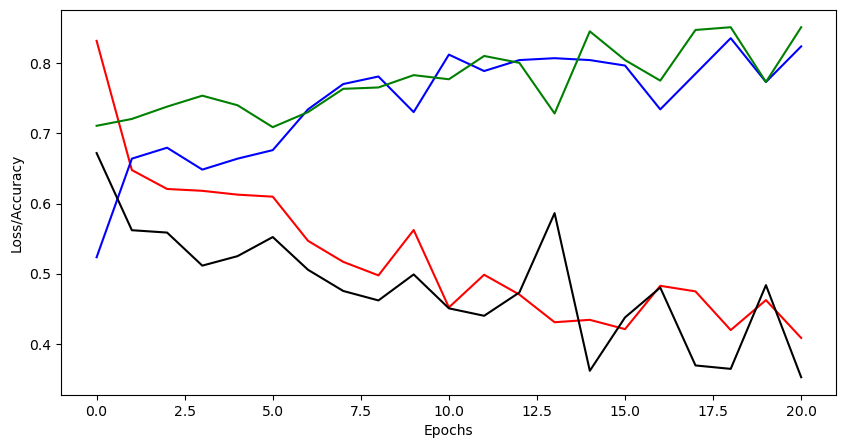

In [18]:
#Visualization of the model accuracy
h = modelfit.history
print(h.keys())

fig, ax = plt.subplots(1,1, figsize= (10,5))

ax.plot(h['loss'],color='red')
ax.plot(h['accuracy'],color='blue')
ax.plot(h['val_loss'],color='black')
ax.plot(h['val_accuracy'],color='green')

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss/Accuracy')

plt.show()


In [20]:
#Load the model for analysis
from keras.models import load_model
mymodel2 = load_model("cnn_finalmodel")


In [21]:
#Model accuracy against test data
result = mymodel2.evaluate_generator(test_data)

print(test_data)

/var/folders/kd/5x8zcnps159dtsr6m1bqvsfm0000gn/T/ipykernel_40088/3503831211.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result = mymodel2.evaluate_generator(test_data)


In [22]:
##Model accuracy against test data
print(result)
print(mymodel2.metrics_names)
print("accuracy of our model =", result[1])

[0.3527145981788635, 0.859666645526886]
['loss', 'accuracy']
accuracy of our model = 0.859666645526886


1/1 [==============================] - 0s 235ms/step
Tumor status prediction = no
Passed the test
1/1 [==============================] - 0s 36ms/step
Tumor status prediction = yes
Passed the test
1/1 [==============================] - 0s 35ms/step
Tumor status prediction = no
Passed the test
1/1 [==============================] - 0s 40ms/step
Tumor status prediction = yes
Passed the test
1/1 [==============================] - 0s 42ms/step
Tumor status prediction = no
Passed the test
1/1 [==============================] - 0s 42ms/step
Tumor status prediction = no
Passed the test
1/1 [==============================] - 0s 40ms/step
Tumor status prediction = no
Passed the test
1/1 [==============================] - 0s 38ms/step
Tumor status prediction = no
Passed the test
1/1 [==============================] - 0s 38ms/step
Tumor status prediction = yes
Passed the test
1/1 [==============================] - 0s 38ms/step
Tumor status prediction = yes
Passed the test
1/1 [====================

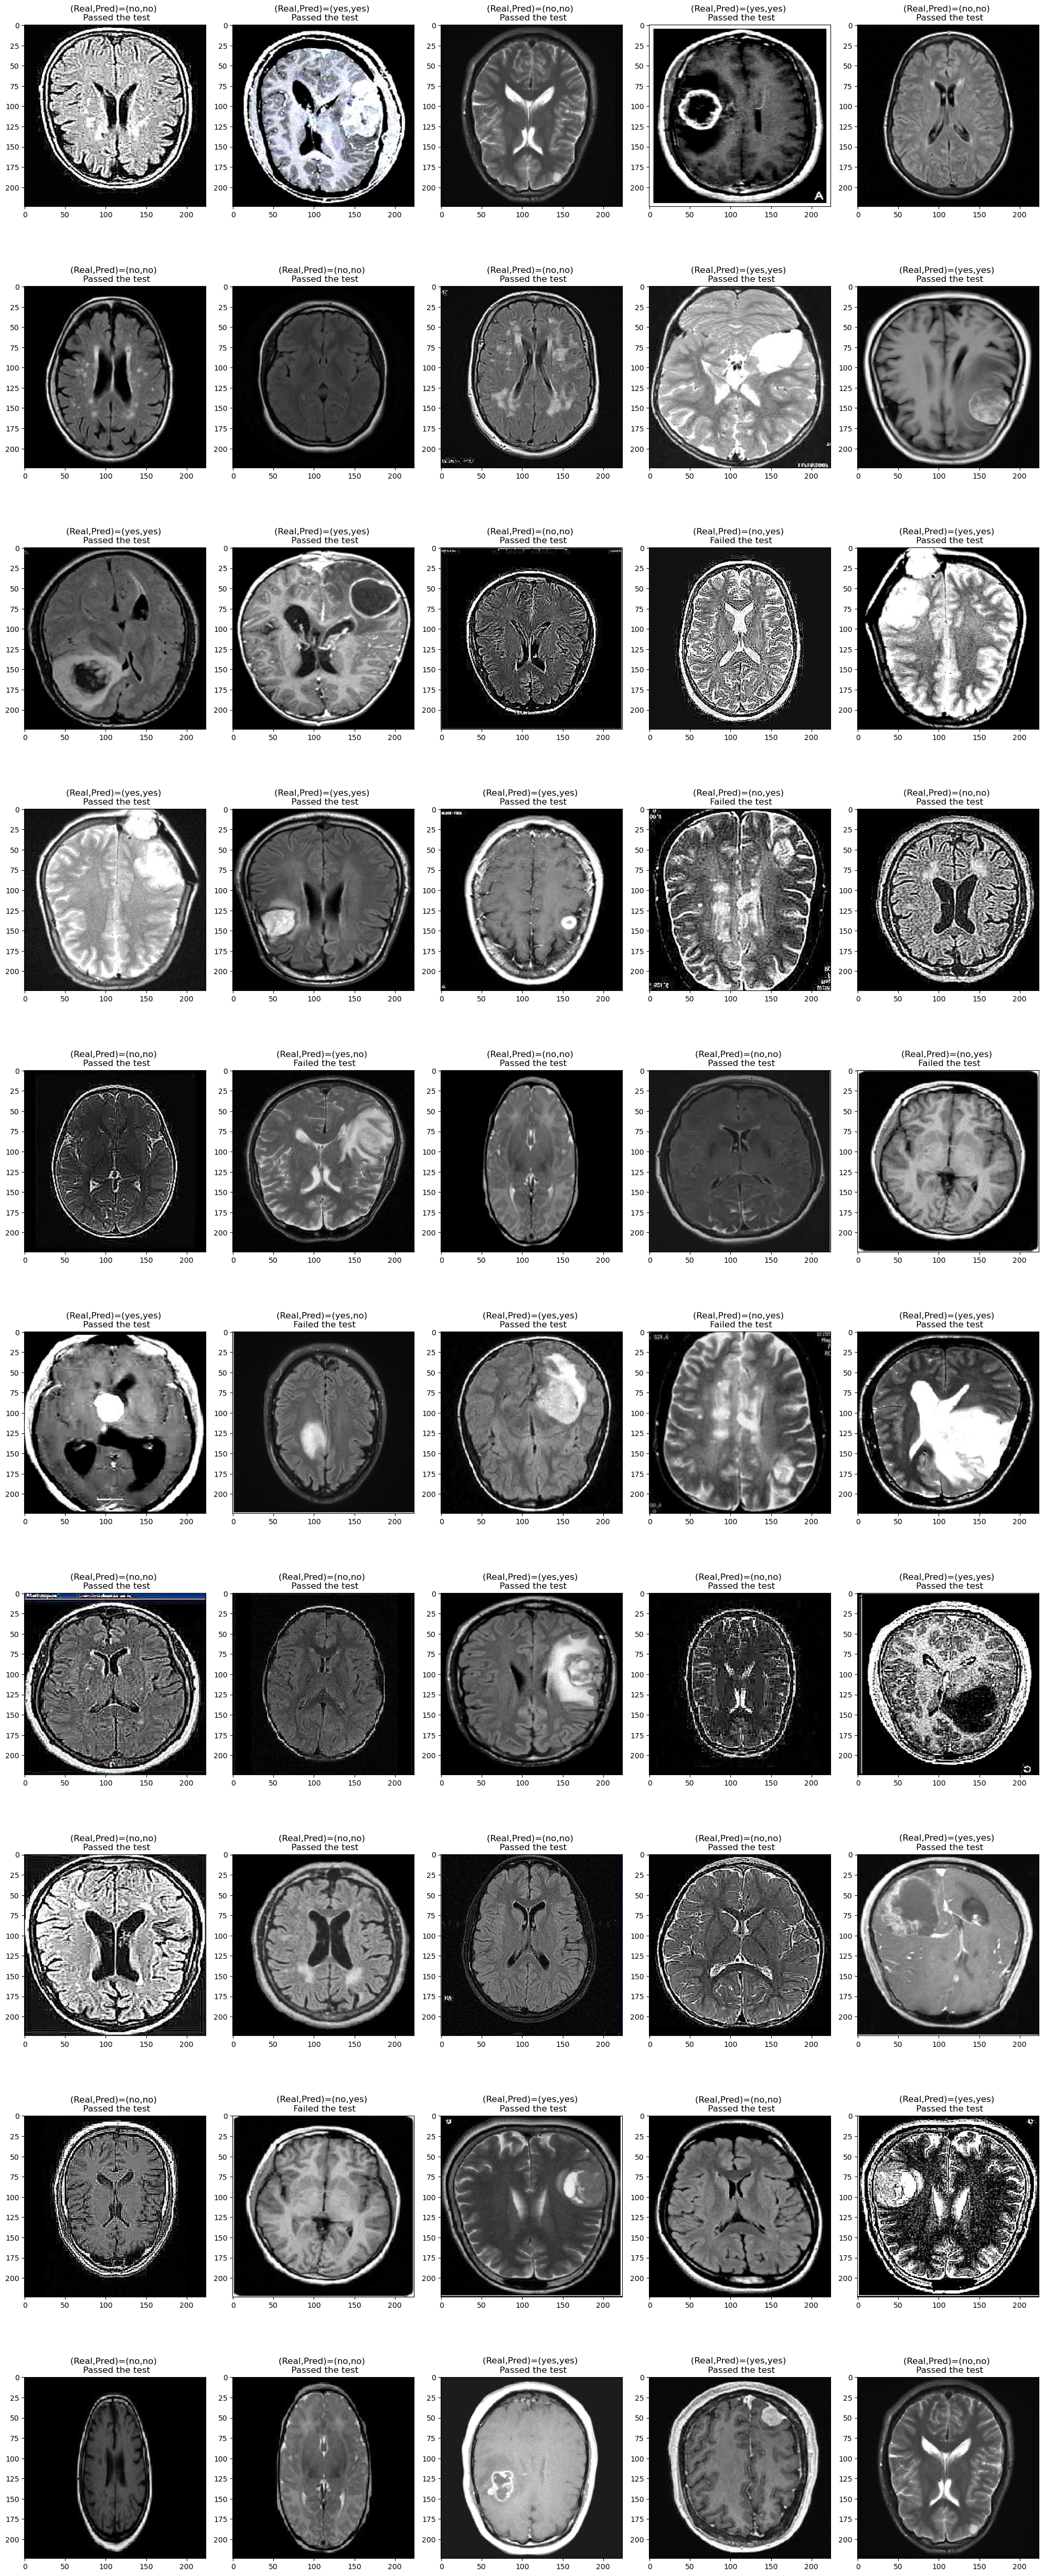

[0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0] [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]


In [23]:
#test the brain tumor images
import random

ROOT_DIR='brain-tumor-detection'
fig, ax = plt.subplots(10,5,figsize=(20,50))
y_test=[]
y_predict=[]

for i in range(50):
    imagetype = np.random.choice(["yes","no"],size=1)
    if imagetype=="yes":
        path_of_image = ROOT_DIR + "/yes/y" + str(int(random.random()*200))  +".jpg"
    else:
        path_of_image = ROOT_DIR + "/no/no" + str(int(random.random()*200))  +".jpg"

    img = load_img(path_of_image, target_size=(224,224) )
    input_data = img_to_array(img)/255
    
    ax.flat[i].imshow(input_data)
  
    #print(input_data.shape)
    
    input_data = np.expand_dims(input_data,axis=0)
    #print(input_data.shape)
    prob = mymodel.predict(input_data)
    #print(prob)
    #print(path_of_image)
    
    if prob > 0.5:
        print("Tumor status prediction = yes")
        if imagetype=="yes":
            print("Passed the test")
            titleS="(Real,Pred)=(yes,yes) \n Passed the test"
            y_test.append(1)
            y_predict.append(1)
        else: 
            print("Failed the test")
            titleS="(Real,Pred)=(no,yes) \n Failed the test"
            y_test.append(0)
            y_predict.append(1)
    else:
        print("Tumor status prediction = no")
        if imagetype=="yes":
            print("Failed the test")
            titleS="(Real,Pred)=(yes,no) \n Failed the test"
            y_test.append(1)
            y_predict.append(0)
        else: 
            print("Passed the test")
            titleS="(Real,Pred)=(no,no) \n Passed the test"
            y_test.append(0)
            y_predict.append(0)
    ax.flat[i].set_title(titleS)

fig.tight_layout()                
plt.show() 
print(y_test,y_predict)

In [60]:
#Classification report, confusion matrix
#define a function to plot 2x2 confusion matrix
def plot_confusion_matrix(cnf_mat, LabelS, cmap=plt.cm.Blues):
    plt.figure(figsize=(3,3))
    im=plt.imshow(cnf_mat, interpolation='nearest', cmap=cmap)
    #plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(LabelS))
    plt.xticks(tick_marks, LabelS, rotation=45)
    plt.yticks(tick_marks, LabelS)
    plt.colorbar(im,fraction=0.046, pad=0.04)

    for i  in range(0,2):
        for j in range(0,2):
            plt.text(j,i,cnf_mat[i][j])

#Retrive classification report and consfusion matrix
from sklearn.metrics import classification_report, confusion_matrix
def EvaluateModel(y_test, y_predict):
    print( classification_report(y_test, y_predict) )
    cnf_mat = confusion_matrix(y_test, y_predict, labels=[0,1])
    print(cnf_mat)
    plot_confusion_matrix(cnf_mat, LabelS=['Benign(0)','Malignant(1)'])

[0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0] [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.80      0.91      0.85        22

    accuracy                           0.86        50
   macro avg       0.86      0.87      0.86        50
weighted avg       0.87      0.86      0.86        50

[[23  5]
 [ 2 20]]


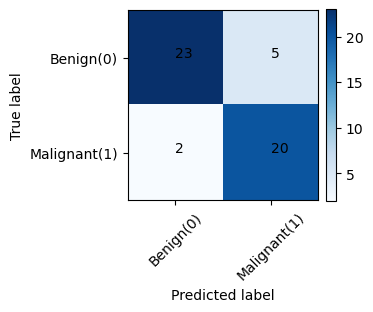

In [61]:
# Plotting confusion matrix
print(y_test,y_predict)
EvaluateModel(y_test, y_predict) 


### The model accuracy of our custom build CNN architecture is 90%

### It is far better than one obtains using Resnet50 CNN architecture. The above project using ResNet50 CNN architecture has been shown in "main_cnn_resnet50.ipynb"

In [45]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, \
ImageDataGenerator
from keras.models import load_model
import numpy as np
#img = load_img("brain-tumor-detection/yes/y999.jpg", target_size=(224,224) )
for i in range(1,10):
    file_image="brain-tumor-detection/no/no"+str(i) +".jpg"
    img = load_img(file_image, target_size=(224,224) )
    print(file_image)
    input_data = img_to_array(img)/255
    
    input_data = np.expand_dims(input_data,axis=0)
    mymodel2 = load_model("cnn_finalmodel")
    prob = mymodel2.predict(input_data)
    print(prob)

brain-tumor-detection/no/no1.jpg
1/1 [==============================] - 0s 91ms/step
[[0.00238801]]
brain-tumor-detection/no/no2.jpg
1/1 [==============================] - 0s 85ms/step
[[0.07022234]]
brain-tumor-detection/no/no3.jpg
1/1 [==============================] - 0s 83ms/step
[[0.0838539]]
brain-tumor-detection/no/no4.jpg
1/1 [==============================] - 0s 88ms/step
[[0.3196026]]
brain-tumor-detection/no/no5.jpg
1/1 [==============================] - 0s 83ms/step
[[0.34237546]]
brain-tumor-detection/no/no6.jpg
1/1 [==============================] - 0s 80ms/step
[[0.6729058]]
brain-tumor-detection/no/no7.jpg
1/1 [==============================] - 0s 79ms/step
[[0.44158742]]
brain-tumor-detection/no/no8.jpg
1/1 [==============================] - 0s 79ms/step
[[0.4864833]]
brain-tumor-detection/no/no9.jpg
1/1 [==============================] - 0s 82ms/step
[[0.06019878]]


In [ ]:
model.predict_generator(test_batches, steps=1, verbose=0)

In [49]:
a=2